In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('final_feat.xlsx')

In [3]:
df1=df[['Completed Jobs','TMAX','Avg Sales','tech_count','Income_y']]

In [4]:
df1.head()

,Completed Jobs,TMAX,Avg Sales,tech_count,Income_y
0,57,65,3617.444828,59,23933.54
1,77,71,1781.345385,40,65232.03
2,55,69,459.248750,21,26195.32
3,6,69,846.000000,9,264.00
4,73,77,1820.060789,60,48506.16


In [5]:
df1=df1.drop_duplicates(ignore_index=True)

In [6]:
train=df1[0:300]
test=df1[300:]

In [9]:
y=train['Income_y']
X=train.drop(['Income_y'],axis=1)

In [11]:
y_=test['Income_y']
X_=test.drop(['Income_y'],axis=1)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
from sklearn.ensemble import RandomForestRegressor


In [15]:
# intializing the randomeforest regressor

random_forest_reg=RandomForestRegressor()

In [16]:
# fit the X_train and y_train values to the model
random_forest_reg.fit(X_train,y_train)

RandomForestRegressor()

In [17]:
# training data set score
random_forest_reg.score(X_train,y_train)

0.94438767898346

In [18]:
# test data set score
random_forest_reg.score(X_test,y_test)

0.7435621821235848

In [19]:
# test data set score
random_forest_reg.score(X_,y_)

0.41751960245469477

In [20]:
y_pred_1=random_forest_reg.predict(X_)

In [21]:
from sklearn import metrics

In [22]:
# RMSE and MAE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_,y_pred_1)))
print('MAE:',metrics.mean_absolute_error(y_,y_pred_1))

RMSE: 29505.515190008333
MAE: 22736.210620454538


In [23]:
comp=pd.DataFrame({'Actual':y_,'Predicted':y_pred_1})

<AxesSubplot:>

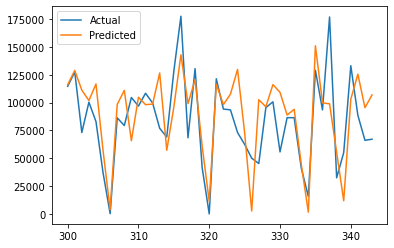

In [24]:
comp.plot()

In [25]:
comp['Error']=comp['Actual']-comp['Predicted']

In [26]:
comp

,Actual,Predicted,Error
300,114534.21,115990.4961,-1456.2861
301,127412.10,128819.5529,-1407.4529
302,73107.94,111123.8081,-38015.8681
303,100335.70,101809.0142,-1473.3142
304,82920.44,116674.5105,-33754.0705
305,36992.00,56830.5079,-19838.5079
306,326.00,3902.1646,-3576.1646
307,86287.17,98328.6808,-12041.5108
308,79380.38,110917.6661,-31537.2861
309,104509.01,65792.7844,38716.2256


# Hyperparamter Optimization

In [42]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,15,20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,5,10,15]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [43]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42,n_jobs=-1)
# Fit the random search model
rf_random.fit(X,y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  7.4min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 5, 10,
                                                             15],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   rand

In [44]:
rf_random.best_params_



{'n_estimators': 1600,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': None,
 'bootstrap': True}

In [45]:
rf_random.best_score_


0.5209453371205239

In [56]:
tuned_model = RandomForestRegressor(n_estimators=1600,min_samples_split=10,min_samples_leaf=4,max_features='log2',max_depth=None,bootstrap=True)


In [57]:
tuned_model.fit(X_train,y_train)

RandomForestRegressor(max_features='log2', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=1600)

In [58]:
tuned_model.score(X_train,y_train)

0.8010971889902752

In [59]:
tuned_model.score(X_test,y_test)

0.7331987336632989

In [60]:
tuned_model.score(X_,y_)

0.425760484398345

In [61]:
y_pred_2=tuned_model.predict(X_)

In [62]:
comp_1=pd.DataFrame({'Actual':y_,'Predicted':y_pred_2})

<AxesSubplot:>

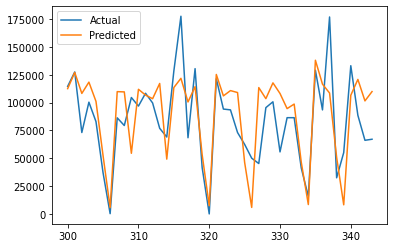

In [63]:
comp_1.plot()

In [64]:
comp_1['Error']=comp_1['Actual']-comp_1['Predicted']

In [66]:
comp_1

,Actual,Predicted,Error
300,114534.21,112475.426773,2058.783227
301,127412.10,126993.830324,418.269676
302,73107.94,108179.037214,-35071.097214
303,100335.70,118303.473452,-17967.773452
304,82920.44,101051.512474,-18131.072474
305,36992.00,52358.731432,-15366.731432
306,326.00,5729.353434,-5403.353434
307,86287.17,109776.270189,-23489.100189
308,79380.38,109552.615428,-30172.235428
309,104509.01,54477.556643,50031.453357


In [67]:
# RMSE and MAE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_,y_pred_2)))
print('MAE:',metrics.mean_absolute_error(y_,y_pred_2))

RMSE: 29296.050950584457
MAE: 23316.50909461636
